# Simple Neural Network
### Import libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

### Simple explanation

- A simple neural network consists of layers neurons or nodes that is densely connected. Computation of a neuron is `y = w * x + b`
- After the linear computation, the result will be feed to an activation function. In this example, we use ReLU, so the computation is y = max(0, x)
- The learning algorithm, we will use is Adam with loss function is sparse categorical cross entropy

### Load data

- In this example, we will load data from the famous MNIST dataset. The dataset consists of images of handwritten numerical data.
- The image is represented as a 28x28 matrix of value between 0 to 255. 
- Below is the code to load the data. 

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.astype("float") / 255, x_test.astype("float") / 255

#### Here is a sample image from the data

This is the image for number: 5 



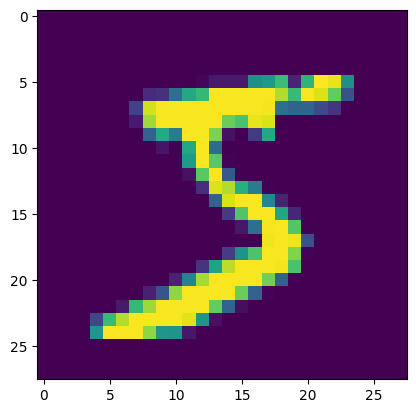

In [3]:
print(f"This is the image for number: {y_train[0]} \n")
plt.imshow(x_train[0])
plt.show()

### Build the model

- Our model is a simple neural network model that have one densely connected layer of 64 nodes.
- One output layer with 10 nodes represent the prediction of number from 0 to 9
- The flattten layer at the beginning is just a reprocessing layer that transform a 28x28 (28, 28) matrix to a 1-dimension vector of (786, 1).

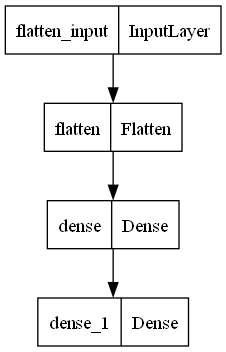

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=x_train[0].shape),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10),
])

tf.keras.utils.plot_model(model)

### Running the model

#### Loss function, optimizer and metrics

In [5]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [6]:
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

#### Fit the model

In [7]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5


1875/1875 [==============================] - 3s 1ms/step - loss: 0.3014 - accuracy: 0.9142
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1509 - accuracy: 0.9566
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1098 - accuracy: 0.9677
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0862 - accuracy: 0.9740
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0700 - accuracy: 0.9785


#### Evaluate the model

In [8]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0873 - accuracy: 0.9746 - 478ms/epoch - 2ms/step


[0.08727674931287766, 0.9746000170707703]

### Example and visualization of predictions